### Treść zadania

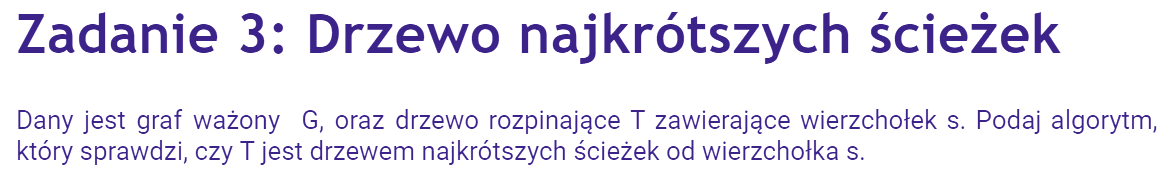

### Omówienie algorytmu

W poniższej implementacji założyłem, że oba grafy są reprezentowane, przy pomocy list sąsiedztwa. Założyłem również, że w drzewie $ T $ również są zapisane wagi krawędzi, które odpowadają wagom tych krawędzi z grafu $ G $ (jeżeli nie byłyby zapisane, wówczas sprawdzanie wag w listach sąsiedztwa grafu $ G $ byłoby niewydajne, więc łatwiejsza i lepsza wersja algorytmu w tym przypadku opierałaby się na grafach reprezentowanych przy pomocy macierzy). W pierwszym kroku uzupełniam tablicę długości najkrotszych ścieżek w drzewie $ T $ z wierzchołka $ s $ do wszystkich innych. Ponieważ jest to drzewo, wystarczy przejść je zwykłym DFS/BFS i zapisać wagi kolejnych wierzchołków jako $ waga\_rodzica + waga\_krawędzi $. W kolejnym kroku sprawdzamy, czy te ścieżki są rzeczywiście najkrótsze. Wykorzystujemy podejście podobne do algorytmu Dijkstry, jednakże nie musimy korzystać z kolejki priorytetowej i wyznaczać długości najkrótszych ścieżek, przy pomocy tego algorytmu. Dużo prościej jest sprawdzić, czy możliwa jest relaksacja jakiegokoliwek wierzchołka, a więc skrócenie długości ścieżki, jaka do niego prowadzi (oczywiście korzystamy z wyznaczonych wcześniej wag). Zauważmy, że taka sytuacja się zdarzy jedynie wtedy, gdy para wierzchołków $ u $, $ v $ nie jest połączona krawędzią w drzewie $ T $ oraz zajdzie warunek $ weights[u] + waga\_krawędzi < weights[v] $, gdzie $ v $ jest dzieckiem $ u $ (odwiedzamy go później). Nie musimy zatem odpalać żadnego algorytmu, który przeszukuje graf, a jedynie wystarczy w pętli, dla każdej krawędzi (czyli dla każdej pary wierzchołków $ u $, $ v $) da się zrelaksować któryś z tych wierzchołków. Zauważmy, że daną krawędź będziemy sprawdzać 2 razy, ale nie jest to problem, ponieważ, jeżeli np. $ u $ był wcześniej sprawdzony od $ v $, to nigdy ścieżka przechodząca z $ v $ do $ u $ nie będzie krótsza niż ta, która przechodzi z $ u $ do $ v $.

    if weights[u] + weight < weights[v]:
        return False

Powyższa konstrukcja warunkowa załatwia nam wszystko, co potrzebne.

### Złożoność

###### Obliczeniowa:
$ O(E) $
###### Pamięciowa:
$ O(V) $

### Implementacja

In [1]:
def check(G, T, s):
    n = len(T)
    inf = float('inf')
    visited = [False] * n
    weights = [inf] * n
    weights[s] = 0
    
    # Find the weights from the T spanning tree to each vertex from the source s
    def dfs(u):
        visited[u] = True
        for v, weight in T[u]:
            if not visited[v]:
                weights[v] = weights[u] + weight
                dfs(v)
        
    dfs(s)
    
    # Go through a G graph and check if we can relax some of the vertices
    for u in range(n):
        for v, weight in G[u]:
            # If we can relax some of the vertices, return False
            # (We don't have to check any more condition as if a vertex v is
            # the u's parent, a condition below will be never satisfied)
            if weights[u] + weight < weights[v]:
                return False
    return True

###### Kilka testów

*Pomocnicze:*

In [2]:
def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

*Testy:*

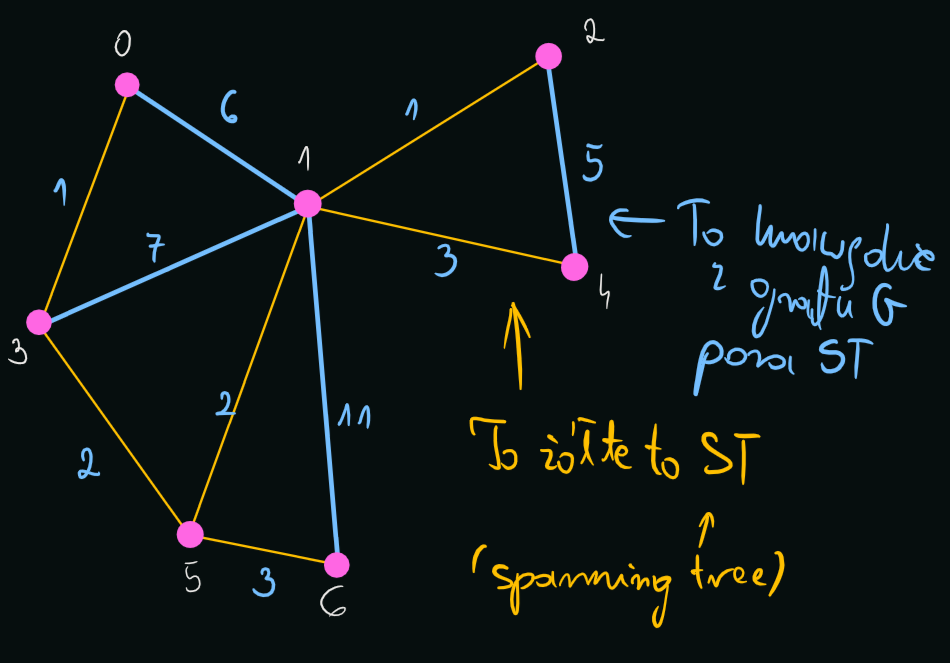

In [3]:
EG = [(0, 1, 6), (3, 1, 7), (6, 1, 11), (2, 4, 5), (1, 2, 1), (1, 4, 3), (0, 3, 1), (3, 5, 2), 
      (5, 1, 2), (5, 6, 3)]
ET = [(1, 2, 1), (1, 4, 3), (0, 3, 1), (3, 5, 2), (5, 1, 2), (5, 6, 3)]

G = undirected_weighted_graph_list(EG)
T = undirected_weighted_graph_list(ET)

print(check(G, T, 0))

True


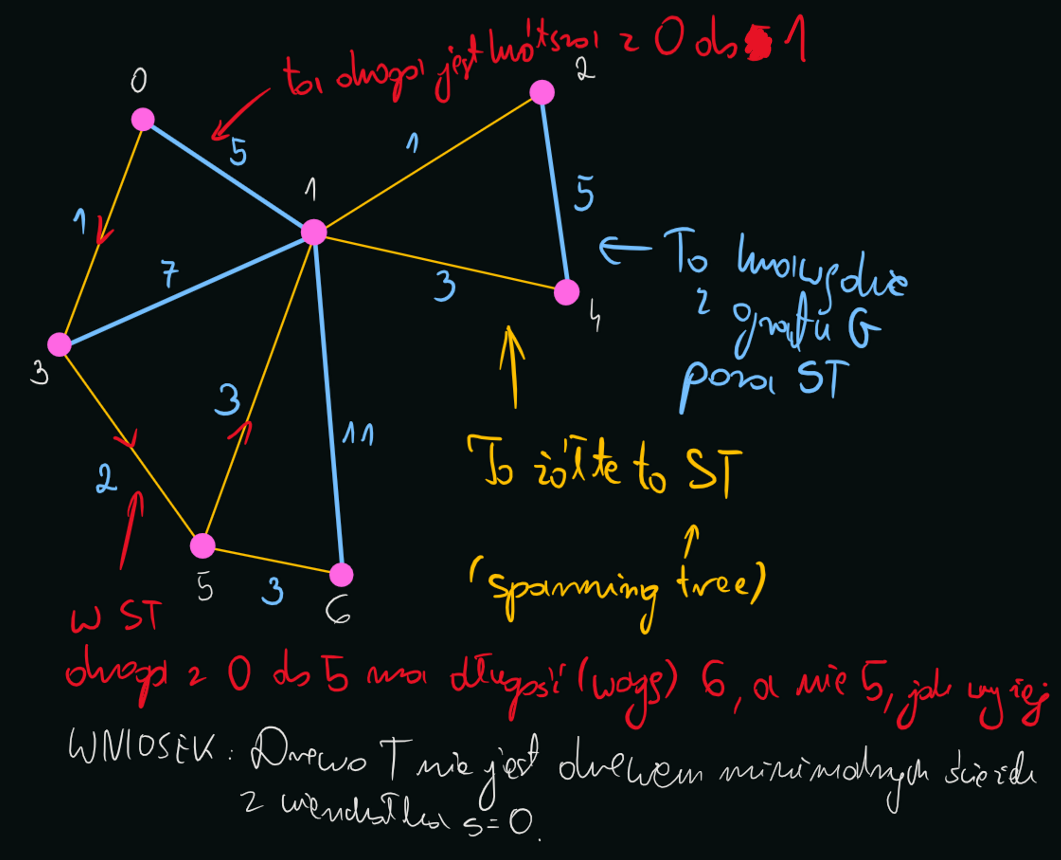

In [4]:
EG = [(0, 1, 5), (3, 1, 7), (6, 1, 11), (2, 4, 5), (1, 2, 1), (1, 4, 3), (0, 3, 1), (3, 5, 2), 
      (5, 1, 3), (5, 6, 3)]
ET = [(1, 2, 1), (1, 4, 3), (0, 3, 1), (3, 5, 2), (5, 1, 3), (5, 6, 3)]

G = undirected_weighted_graph_list(EG)
T = undirected_weighted_graph_list(ET)

print(check(G, T, 0))

False
